In [2]:
import numpy as np
import pandas as pd
import cv2
from random import randint
import os
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
import seaborn as sns
sns.set_style("white")

from sklearn.model_selection import train_test_split
from losers import bce_dice_loss, dice_loss, dice_coeff, jaccard_loss, bce_jacard_loss
from helpers import create_dataset_from_tfrecord, create_dataset_from_directory, create_deserializer, get_test_generator, create_data_set_from_generator
from augs import tf_augs, tf_alldir_augs, tf_alldir_rotate_augs
from models import build_model, build_model_1layer, UnetModel
from helpers import create_tfrecords, get_reshaper
import tensorflow as tf
from util import create_coverage_stratas, get_paths, print_history

In [3]:
input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_model(input_layer, 32)
model = tf.keras.models.Model(input_layer, output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", dice_coeff])
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_augs]), batch_size=32)

test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=32)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
epochs = 200
batch_size = 20
# train_ds = train_ds.batch(20)train_ds = train_ds.shuffle(32)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=25,steps_per_epoch=100,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

NameError: name 'tf' is not defined

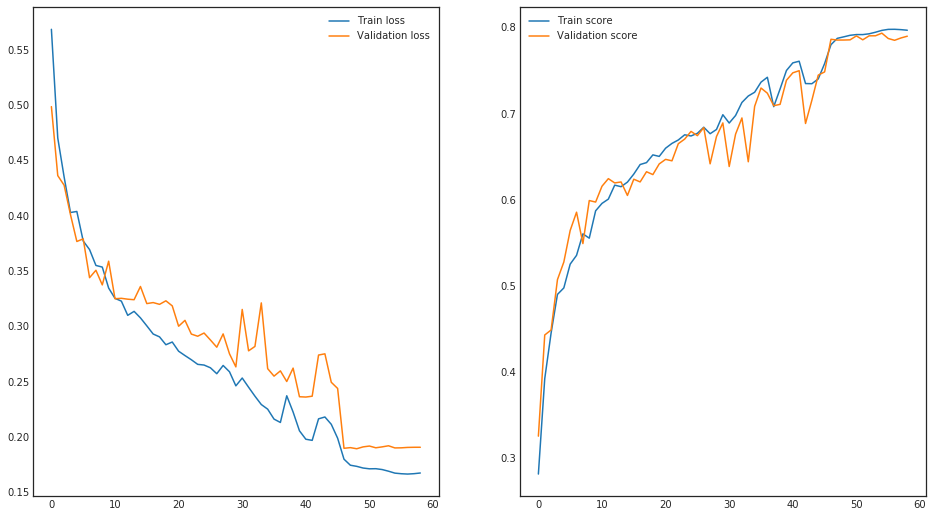

In [0]:
print_history(history)

In [0]:
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_augs]), batch_size=40)
test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=40)

input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_model_1layer(input_layer, 64)
model = tf.keras.models.Model(input_layer, output_layer)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", dice_coeff])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
train_ds = train_ds.shuffle(40)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=20,steps_per_epoch=80,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

W0813 16:22:57.088586 140581319808896 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0813 16:22:57.871354 140581319808896 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
79/80 [============================>.] - ETA: 1s - loss: 0.5946 - acc: 0.7432 - dice_coeff: 0.2585
Epoch 00001: val_loss improved from inf to 0.56175, saving model to ./keras.model
80/80 [==============================] - 92s 1s/step - loss: 0.5941 - acc: 0.7434 - dice_coeff: 0.2588 - val_loss: 0.5618 - val_acc: 0.7471 - val_dice_coeff: 0.2898
Epoch 2/200
79/80 [============================>.] - ETA: 0s - loss: 0.5422 - acc: 0.7488 - dice_coeff: 0.2765
Epoch 00002: val_loss did not improve from 0.56175
80/80 [==============================] - 70s 873ms/step - loss: 0.5434 - acc: 0.7476 - dice_coeff: 0.2777 - val_loss: 0.5866 - val_acc: 0.7471 - val_dice_coeff: 0.3123
Epoch 3/200
79/80 [============================>.] - ETA: 0s - loss: 0.5383 - acc: 0.7478 - dice_coeff: 0.2860
Epoch 00003: val_loss improved from 0.56175 to 0.51037, saving model to ./keras.model
80/80 [==============================] - 70s 881ms/step - loss: 0.5383 - acc: 0.7476 - dice_coeff: 0.2862 - val_los

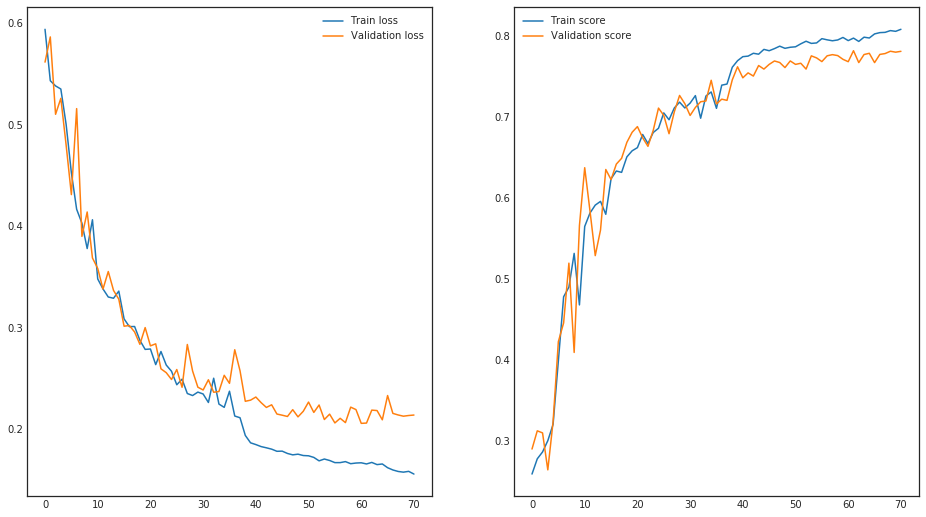

In [0]:

print_history(history)

In [0]:
input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_model_1layer(input_layer, 32)
model = tf.keras.models.Model(input_layer, output_layer)
optimizer=tf.keras.train.AdamOptimizer(0.0002)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=["accuracy", dice_coeff])
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_augs]), batch_size=32)

test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=32)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
epochs = 200
batch_size = 20
# train_ds = train_ds.batch(20)train_ds = train_ds.shuffle(32)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=25,steps_per_epoch=100,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

W0814 07:44:01.600279 140315148400512 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
 99/100 [============================>.] - ETA: 12s - loss: 0.5638 - acc: 0.7358 - dice_coeff: 0.2794
Epoch 00001: val_loss improved from inf to 0.52258, saving model to ./keras.model
100/100 [==============================] - 1596s 16s/step - loss: 0.5633 - acc: 0.7363 - dice_coeff: 0.2792 - val_loss: 0.5226 - val_acc: 0.7471 - val_dice_coeff: 0.3167
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4813 - acc: 0.7840 - dice_coeff: 0.3810
Epoch 00002: val_loss improved from 0.52258 to 0.42985, saving model to ./keras.model
100/100 [==============================] - 29s 294ms/step - loss: 0.4814 - acc: 0.7842 - dice_coeff: 0.3804 - val_loss: 0.4299 - val_acc: 0.8229 - val_dice_coeff: 0.4714
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4249 - acc: 0.8306 - dice_coeff: 0.4719
Epoch 00003: val_loss improved from 0.42985 to 0.39251, saving model to ./keras.model
100/100 [==============================] - 29s 294ms/step - loss: 

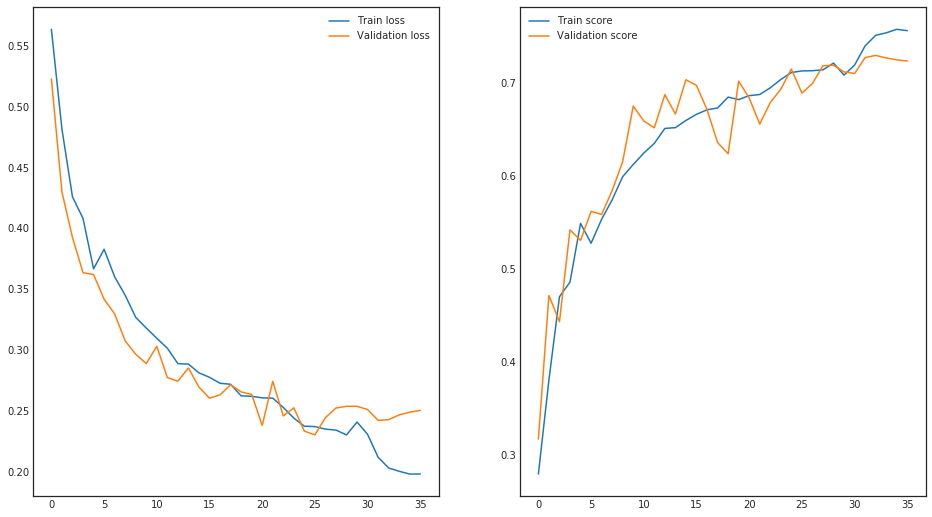

In [0]:

print_history(history)

In [0]:
input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_model(input_layer, 16,0.25)

model = tf.keras.models.Model(input_layer, output_layer)
# optimizer=tf.train.AdamOptimizer(0.0002)
model.compile(loss=bce_dice_loss, optimizer='adam', metrics=["accuracy", dice_coeff])
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_rotate_augs]), batch_size=32)

test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=32)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
epochs = 200
batch_size = 20
train_ds = train_ds.shuffle(32)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=25,steps_per_epoch=100,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/200
 99/100 [============================>.] - ETA: 0s - loss: 0.6743 - acc: 0.3326 - dice_coeff: 0.3358
Epoch 00001: val_loss improved from inf to 0.73411, saving model to ./keras.model
100/100 [==============================] - 32s 317ms/step - loss: 0.6742 - acc: 0.3352 - dice_coeff: 0.3358 - val_loss: 0.7341 - val_acc: 0.7479 - val_dice_coeff: 0.2695
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.6172 - acc: 0.5915 - dice_coeff: 0.3954
Epoch 00002: val_loss improved from 0.73411 to 0.48337, saving model to ./keras.model
100/100 [==============================] - 22s 217ms/step - loss: 0.6159 - acc: 0.5938 - dice_coeff: 0.3974 - val_loss: 0.4834 - val_acc: 0.8202 - val_dice_coeff: 0.5795
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4826 - acc: 0.8049 - dice_coeff: 0.5473
Epoch 00003: val_loss improved from 0.48337 to 0.44831, saving model to ./keras.model
100/100 [==============================] - 22s 216ms/step - loss: 0

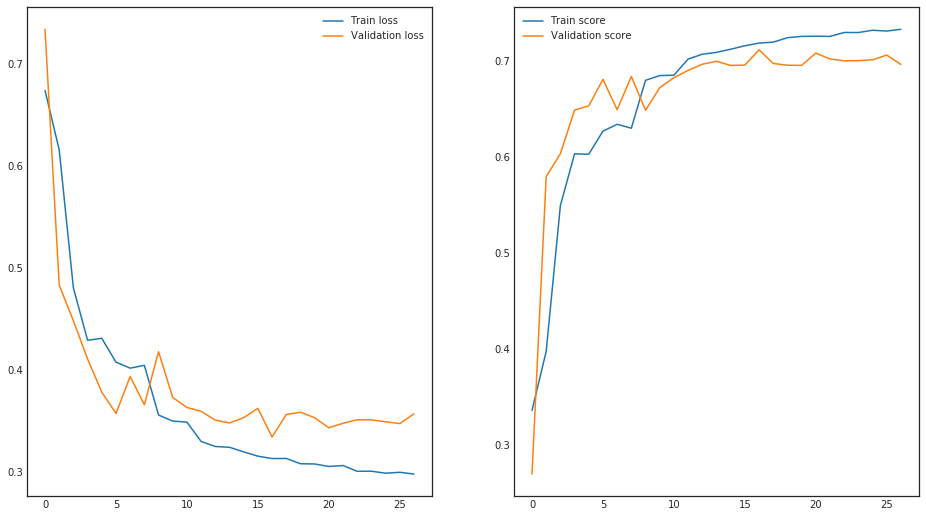

In [0]:
print_history(history)

In [0]:
input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_res_model(input_layer, 16)

model = tf.keras.models.Model(input_layer, output_layer)
# optimizer=tf.train.AdamOptimizer(0.0002)
model.compile(loss=bce_dice_loss, optimizer='adam', metrics=["accuracy", dice_coeff])
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_rotate_augs]), batch_size=32)

test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=32)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
epochs = 200
batch_size = 20
train_ds = train_ds.shuffle(32)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=25,steps_per_epoch=100,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

W0814 11:33:47.876761 140024327341952 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/200
 99/100 [============================>.] - ETA: 0s - loss: 0.6715 - acc: 0.5626 - dice_coeff: 0.3439
Epoch 00001: val_loss improved from inf to 0.55842, saving model to ./keras.model
100/100 [==============================] - 42s 416ms/step - loss: 0.6710 - acc: 0.5649 - dice_coeff: 0.3444 - val_loss: 0.5584 - val_acc: 0.7188 - val_dice_coeff: 0.4607
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.6780 - acc: 0.6491 - dice_coeff: 0.4014
Epoch 00002: val_loss did not improve from 0.55842
100/100 [==============================] - 30s 301ms/step - loss: 0.6779 - acc: 0.6494 - dice_coeff: 0.4006 - val_loss: 0.6745 - val_acc: 0.6339 - val_dice_coeff: 0.3270
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.6542 - acc: 0.5663 - dice_coeff: 0.3654
Epoch 00003: val_loss did not improve from 0.55842
100/100 [==============================] - 30s 297ms/step - loss: 0.6538 - acc: 0.5653 - dice_coeff: 0.3662 - val_loss: 0.6407 - val_acc:

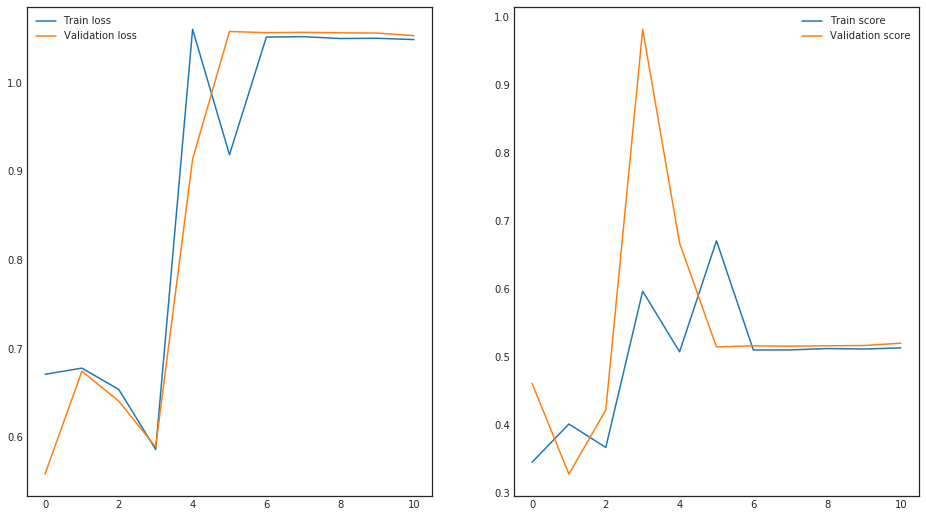

In [0]:
print_history(history)

In [0]:
input_layer = tf.keras.layers.Input((128, 128, 1))
output_layer = build_model(input_layer, 32)

model = tf.keras.models.Model(input_layer, output_layer)
# optimizer=tf.train.AdamOptimizer(0.0002)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=["accuracy", dice_coeff])
train_ds = create_dataset_from_directory('/content/drive/My Drive/train_record', create_deserializer(augmentations=[tf_alldir_rotate_augs]), batch_size=32)

test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=32)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, verbose=1)
model_checkpoint = tf.keras.callbacks.ModelCheckpoint("./keras.model", save_best_only=True, verbose=1)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(factor=0.1, patience=5, min_lr=0.00001, verbose=1)
# tensorboard_callback = tf.keras.callbacks.TensorBoard('./comb_model', histogram_freq=1)
# tbc=TensorBoardColab()
epochs = 200
batch_size = 20
train_ds = train_ds.shuffle(32)
train_ds = train_ds.repeat(200)
history = model.fit(train_ds, validation_data=test_ds,validation_steps=25,steps_per_epoch=100,
                    epochs=200,
                    callbacks=[early_stopping, model_checkpoint, reduce_lr])

Epoch 1/200
 99/100 [============================>.] - ETA: 0s - loss: 0.5401 - acc: 0.7429 - dice_coeff: 0.2953
Epoch 00001: val_loss improved from inf to 0.51944, saving model to ./keras.model
100/100 [==============================] - 50s 496ms/step - loss: 0.5388 - acc: 0.7438 - dice_coeff: 0.2955 - val_loss: 0.5194 - val_acc: 0.7471 - val_dice_coeff: 0.3627
Epoch 2/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4671 - acc: 0.7500 - dice_coeff: 0.3738
Epoch 00002: val_loss improved from 0.51944 to 0.41036, saving model to ./keras.model
100/100 [==============================] - 42s 422ms/step - loss: 0.4651 - acc: 0.7512 - dice_coeff: 0.3737 - val_loss: 0.4104 - val_acc: 0.8271 - val_dice_coeff: 0.4307
Epoch 3/200
 99/100 [============================>.] - ETA: 0s - loss: 0.4628 - acc: 0.8094 - dice_coeff: 0.4448
Epoch 00003: val_loss did not improve from 0.41036
100/100 [==============================] - 42s 418ms/step - loss: 0.4638 - acc: 0.8084 - dice_coeff: 0

In [0]:
test_ds = create_dataset_from_directory('/content/drive/My Drive/test_record', create_deserializer(), batch_size=36)

iterator = test_ds.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
  a = sess.run(next_element)
    

In [0]:
def predict_test(model, _input, trues):
  predictions = model.predict(_input)
  num_of_images = _input.shape[0]
  rows = int(np.sqrt(num_of_images)) + 1 
  cols = rows
  f, ax = plt.subplots(rows, cols, figsize=(20,20))
  for i, (img, mask, true_mask) in enumerate(zip(_input, predictions, trues)):
    ax[i // rows][ i % cols].imshow(img.reshape((128, 128)), cmap='gray', vmin=0.0, vmax=1.0)
    ax[i // rows][ i % cols].imshow(mask.reshape((128, 128)), alpha=0.2, cmap='Greens', vmin=0.0, vmax=1.0)    
    ax[i // rows][ i % cols].imshow(true_mask.reshape((128, 128)), alpha=0.1, cmap='Reds', vmin=0.0, vmax=1.0)    

(36, 128, 128, 1)


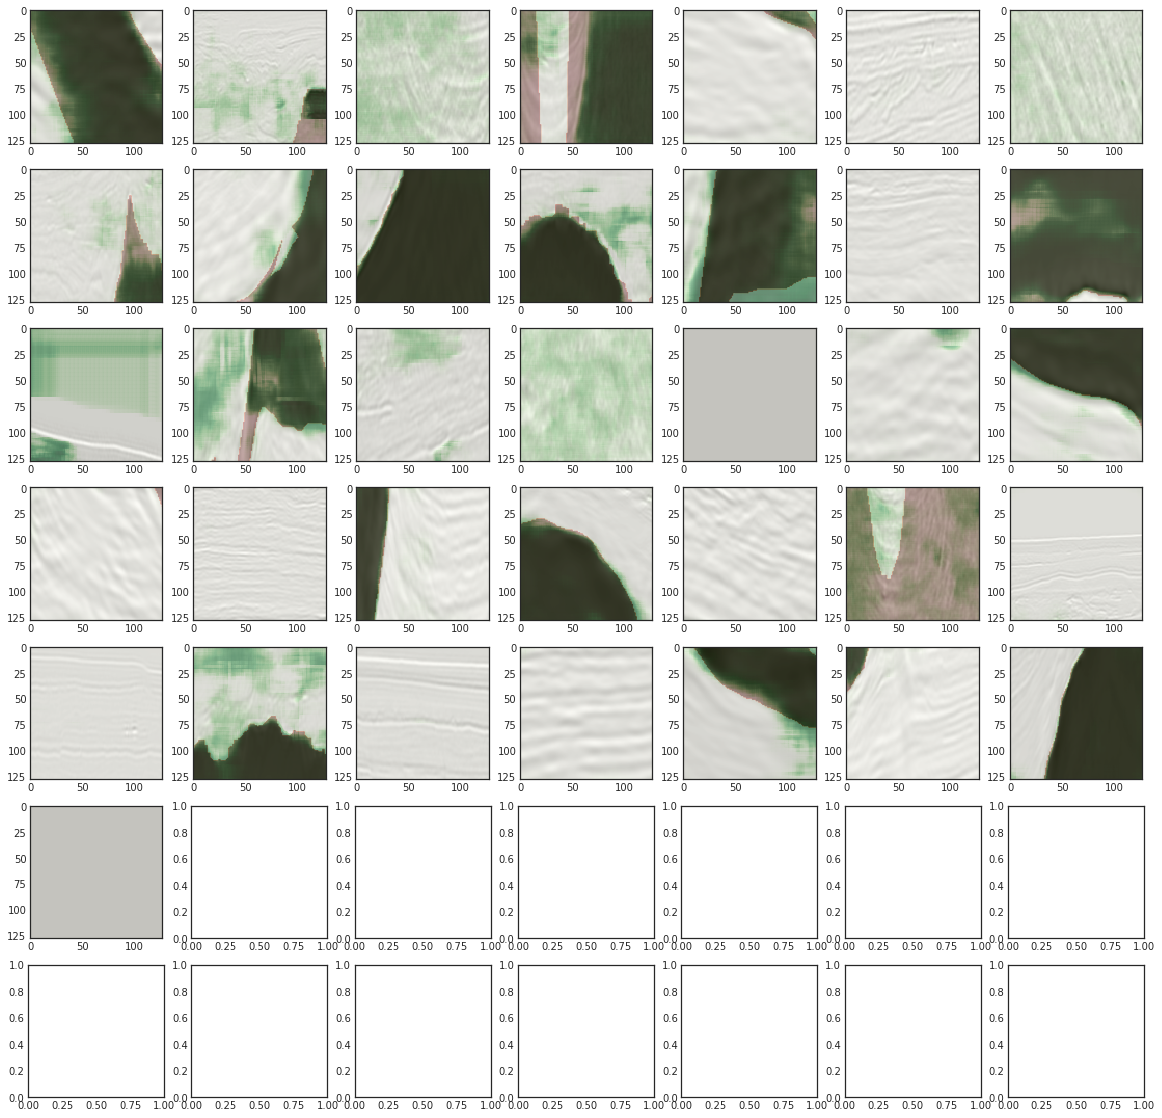

In [0]:
predict_test(model, a[0], a[1])

print(a[0].shape)
   


In [0]:
img = cv2.imread('/content/drive/My Drive/tgs/train/images/fff987cdb3.png', cv2.IMREAD_GRAYSCALE)
img = (cv2.resize(img, (128,128), interpolation=cv2.INTER_CUBIC).astype(np.float64) / 255.0).reshape((1,128,128,1))

In [0]:
a = model.predict(img)

In [0]:
a = (a.reshape((128,128))) * 255.0


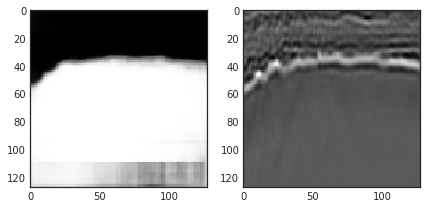

In [0]:
f, ax = plt.subplots(1, 2, figsize=(7,7))
plt.imshow(a, cmap='gray')

ax[0].imshow(a.astype(np.uint8), cmap='gray')
ax[1].imshow((img * 255.0).reshape((128,128)).astype(np.uint8), cmap='gray')

In [0]:
iterator = train_ds.make_one_shot_iterator()
next_element = iterator.get_next()
with tf.Session() as sess:
  a = sess.run(next_element)

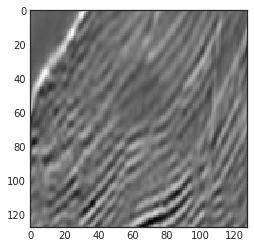

In [0]:
plt.imshow(a[0][7].reshape((128,128)) * 255.0, cmap='gray', vmin=0, vmax=255)